In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.disable_eager_execution()
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Instructions for updating:
non-resource variables are not supported in the long term


# Dataset Creation

# Dataset

Time_stamp 0:

the distances between even numbers are 0

the distances between odd numbers are 0

the distances between a even and odd numbers are 1

Time_stamp 1:

the distances between even numbers are 0

the distances between odd numbers are 1

the distances between a even and odd numbers are 1

Time_stamp 2:

the distances between even numbers are 1

the distances between odd numbers are 0

the distances between a even and odd numbers are 1

Time_stamp 3:

the distances between even numbers are 1

the distances between odd numbers are 1

the distances between a even and odd numbers are 0

In [2]:
# This dictionary is not used in the code. 
time_dict = {0:{'even_dist':0, 'odd_dist':0, 'evn_odd_dist':1},
             1:{'even_dist':0, 'odd_dist':1, 'evn_odd_dist':1},
             2:{'even_dist':1, 'odd_dist':0, 'evn_odd_dist':1},
             3:{'even_dist':1, 'odd_dist':1, 'evn_odd_dist':0}}


In [3]:
import numpy as np
evn = np.arange(0,100,2)
odd = np.arange(1,100,2)
import random
count = 0
couples = []
TRAIN_SIZE = 8000
TRAIN_PER_TIME = 2000
for time in range(0,4): 
    count=0
    while(count<TRAIN_PER_TIME):
        evn1, evn2 = np.random.choice(evn, 2)
        odd1, odd2 = np.random.choice(odd, 2)
        
        if(count<TRAIN_PER_TIME//3):
            if(time == 0):
                if(count%2==0):
                    r1 = evn1
                    r2 = evn2
                else:
                    r1 = odd1
                    r2 = odd2
            elif(time == 1):
                r1 = evn1
                r2 = evn2
            elif(time == 2):
                r1 = odd1
                r2 = odd2
            elif(time == 3):
                r1 = evn1
                r2 = odd1
            couples.append([r1, r2,time, 0])
            count+=1
        else:
            if(time == 0):
                r1 = evn1
                r2 = odd1
            elif(time == 1):
                if(count%2==0):
                    r1 = odd1
                    r2 = odd2
                else:
                    r1 = evn1
                    r2 = odd1
            elif(time == 2):
                if(count%2==0):
                    r1 = evn1
                    r2 = evn2
                else:
                    r1 = evn1
                    r2 = odd1
            elif(time == 3):
                if(count%2==0):
                    r1 = odd1
                    r2 = odd2
                else:
                    r1 = evn1
                    r2 = evn2
            couples.append([r1, r2, time, 1])
            count+=1

In [4]:
couples = np.array(couples)
np.random.shuffle(couples)
couples.shape

(8000, 4)

In [5]:
couples[2000:2010]

array([[52, 67,  0,  1],
       [86, 70,  2,  1],
       [20, 94,  3,  1],
       [64,  9,  1,  1],
       [25, 27,  2,  0],
       [45, 19,  2,  0],
       [48, 62,  1,  0],
       [12, 17,  0,  1],
       [89, 73,  1,  1],
       [25, 59,  3,  1]])

# Insert data into pandas

In [6]:

import pandas as pd
training_data_df = pd.DataFrame(couples, columns = ['obj1','obj2','time','dist'])

"""
X_training and Y_training can be obtained directly from couples numpy array  
Panda is used only to show how one can read data from csv file
"""
# If your train data is a csv file, load training data set from CSV file into panda dataframe
# training_data_df = pd.read_csv("sales_data_training.csv", dtype=float)

'\nX_training and Y_training can be obtained directly from couples numpy array  \nPanda is used only to show how one can read data from csv file\n'

In [7]:
# Pull out columns for X (data to train with) and Y (value to predict)
X_training = training_data_df.drop('dist', axis=1).values
Y_training = training_data_df[['dist']].values

In [8]:
Y_training[:10]

array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [9]:
# Reshaping the data
# X_training is: [[0,2], [1, 3], [4,5], .....]
# X1_training: [0, 1, 4, ....]
# X2_training: [2, 3, 5, ....]

X1_training = X_training.T[0]
X2_training = X_training.T[1]
T_training = X_training.T[2]
print("X_training shape:",X1_training.shape)
print("Y_training shape:",Y_training.shape)

X_training shape: (8000,)
Y_training shape: (8000, 1)


In [10]:
T_training.shape

(8000,)

In [11]:
TOTAL_OBJECTS = 100
EMBEDDING_DIM = 32
TOTAL_TIMES = 4
SCALE_FACTOR = 1

In [12]:
# Input Layer
with tf.variable_scope('input'):
    X1 = tf.placeholder(tf.int32, shape=(None,))
    X2 = tf.placeholder(tf.int32, shape=(None,))
    T = tf.placeholder(tf.int32, shape=(None,))

In [13]:
# Embeddings Layer
with tf.variable_scope('embeddings_layer'):
    embeddings = tf.get_variable(name="embeddings", shape=[TOTAL_OBJECTS, TOTAL_TIMES , EMBEDDING_DIM], initializer = tf.random_uniform_initializer(
    minval=0, maxval=1, seed=None, dtype=tf.dtypes.float32))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    print(embeddings.eval())

[[[0.16514623 0.5251285  0.1701467  ... 0.459844   0.66965055 0.5878806 ]
  [0.17191982 0.46391702 0.8293017  ... 0.9588568  0.12145174 0.847368  ]
  [0.5094166  0.48588932 0.6494862  ... 0.9808887  0.386806   0.74499035]
  [0.11736631 0.97045743 0.00974095 ... 0.6694708  0.06764913 0.620494  ]]

 [[0.03917336 0.3080542  0.8712009  ... 0.83324337 0.7945627  0.9104849 ]
  [0.4567958  0.6902034  0.739692   ... 0.5198046  0.8536346  0.25222898]
  [0.7769681  0.55542314 0.33795428 ... 0.67108095 0.27212298 0.9822972 ]
  [0.83480716 0.38150942 0.01512444 ... 0.71561444 0.9718021  0.42583632]]

 [[0.4759258  0.65124214 0.5130359  ... 0.9884032  0.5247325  0.32854283]
  [0.3544972  0.4400586  0.58424294 ... 0.99340975 0.43976772 0.35393023]
  [0.71782994 0.52287376 0.3932873  ... 0.78312445 0.84984124 0.25104034]
  [0.20933914 0.6568315  0.513464   ... 0.59001946 0.83008754 0.89858985]]

 ...

 [[0.35290802 0.6422379  0.93910503 ... 0.04301012 0.58824146 0.6979029 ]
  [0.95735013 0.13641548 0

In [15]:
# Output Layer
with tf.variable_scope('output'):
    # getting the embeddings of current and neighbor objects
    """
    # Select the embedding (obj_1) and context (obj_2) vectors for the current timestamp
    for example: if obj1= [0,1,2] and timeslot = [0,0,0]
    tf.stack([[0,1,2],[0,0,0], axis=1]) = tf.Tensor:shape=(3,2),
    numpy.array[[0,0],
                [1,0],
                [2,0]]
    col1=obj1, col2=timeslot
    embeddings = [[[e_o0_t0],[e_o0_t1],[e_o0_t2]],
                  [[e_o1_t0],[e_o1_t1],[e_o1_t2]],
                  [[e_o2_t0],[e_o2_t1],[e_o2_t2]]]
    tf.gather_nd(embeddings, tf.stack([obj1, timeslot], axis=1)) = [e_o0_t0, e_o1_t0, e_o2_t0]
    obj1_embedding = tf.gather_nd(embeddings, tf.stack([X1, Timestamp], axis=1))
    obj2_embedding = tf.gather_nd(embeddings, tf.stack([X2, Timestamp], axis=1))
    """
    obj1_embedding = tf.gather_nd(embeddings, tf.stack([X1, T], axis=1))
    obj2_embedding = tf.gather_nd(embeddings, tf.stack([X2, T], axis=1))
    prediction = tf.scalar_mul(SCALE_FACTOR,
                               tf.losses.cosine_distance(tf.nn.l2_normalize(obj1_embedding, axis=1),
                                                         tf.nn.l2_normalize(obj2_embedding, axis=1),
                                                         axis=1, reduction=tf.losses.Reduction.NONE))

In [16]:
# Section Two: Define the cost function of the neural network that will measure prediction accuracy during training
with tf.variable_scope('cost'):
    Y = tf.placeholder(tf.float32, shape=(None,1))
    cost = tf.losses.mean_squared_error(
        labels=tf.scalar_mul(SCALE_FACTOR, Y),
        predictions=prediction,
        reduction=tf.losses.Reduction.SUM)

In [17]:
learning_rate = 0.001

In [18]:
# Section Three: Define the optimizer function that will be run to optimize the neural network
with tf.variable_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [19]:
# Create a summary operation to log the progress of the network
with tf.variable_scope('logging'):
    tf.summary.scalar('current_cost', cost)
    tf.summary.histogram('predicted_value', prediction)
    summary = tf.summary.merge_all()

In [20]:
RUN_NAME = "run 2 with 10000 epoches"
training_epochs = 10000

In [21]:
# Initialize a session so that we can run TensorFlow operations
with tf.Session() as session:

    # Run the global variable initializer to initialize all variables and layers of the neural network
    session.run(tf.global_variables_initializer())
    
    # Create log file writers to record training progress.
    # We'll store training and testing log data separately.
    training_writer = tf.summary.FileWriter("./logs/{}/training".format(RUN_NAME), session.graph)
    #testing_writer = tf.summary.FileWriter("./logs/{}/testing".format(RUN_NAME), session.graph)
    
    # Run the optimizer over and over to train the network.
    # One epoch is one full run through the training data set.
    for epoch in range(training_epochs):

        # Feed in the training data and do one step of neural network training
        session.run(optimizer, feed_dict={X1: X1_training, X2: X2_training, T:T_training, Y: Y_training})
    
        
        # Every 5 training steps, log our progress
        if epoch % 20 == 0:
            # Get the current accuracy scores by running the "cost" operation on the training and test data sets
            training_cost, training_summary = session.run([cost, summary], feed_dict={X1: X1_training, X2: X2_training, T:T_training, Y: Y_training})
            #testing_cost, testing_summary = session.run([cost, summary], feed_dict={X: X_scaled_testing, Y: Y_scaled_testing})

            # Write the current training status to the log files (Which we can view with TensorBoard)
            training_writer.add_summary(training_summary, epoch)
            #testing_writer.add_summary(testing_summary, epoch)

            #Print the current training status to the screen
            print("Epoch: {} - Training Cost: {}".format(epoch, training_cost))

            
    # Training is now complete!
    print("Training is complete!")
    final_training_cost = session.run(cost, feed_dict={X1: X1_training, X2: X2_training, T:T_training, Y: Y_training})
    #final_testing_cost = session.run(cost, feed_dict={X: X_scaled_testing, Y: Y_scaled_testing})

    print("Final Training cost: {}".format(final_training_cost))
    #print("Final Testing cost: {}".format(final_testing_cost))

    # Close the logging writer, otherwise the tensorboard will fail to plot
    training_writer.close()
    #testing_writer.close()
    embeddings_val = embeddings.eval()

Epoch: 0 - Training Cost: 3226.826171875
Epoch: 20 - Training Cost: 3051.7138671875
Epoch: 40 - Training Cost: 2877.04150390625
Epoch: 60 - Training Cost: 2704.792724609375
Epoch: 80 - Training Cost: 2536.836181640625
Epoch: 100 - Training Cost: 2374.68408203125
Epoch: 120 - Training Cost: 2219.43017578125
Epoch: 140 - Training Cost: 2071.74267578125
Epoch: 160 - Training Cost: 1931.899658203125
Epoch: 180 - Training Cost: 1799.85693359375
Epoch: 200 - Training Cost: 1675.372802734375
Epoch: 220 - Training Cost: 1558.1414794921875
Epoch: 240 - Training Cost: 1447.875
Epoch: 260 - Training Cost: 1344.3419189453125
Epoch: 280 - Training Cost: 1247.37548828125
Epoch: 300 - Training Cost: 1156.880126953125
Epoch: 320 - Training Cost: 1072.81494140625
Epoch: 340 - Training Cost: 995.1649169921875
Epoch: 360 - Training Cost: 923.900634765625
Epoch: 380 - Training Cost: 858.9454956054688
Epoch: 400 - Training Cost: 800.1466674804688
Epoch: 420 - Training Cost: 747.2702026367188
Epoch: 440 - T

Epoch: 3540 - Training Cost: 259.7838134765625
Epoch: 3560 - Training Cost: 259.7727355957031
Epoch: 3580 - Training Cost: 259.76214599609375
Epoch: 3600 - Training Cost: 259.7518310546875
Epoch: 3620 - Training Cost: 259.7420349121094
Epoch: 3640 - Training Cost: 259.7325744628906
Epoch: 3660 - Training Cost: 259.7234191894531
Epoch: 3680 - Training Cost: 259.71466064453125
Epoch: 3700 - Training Cost: 259.70623779296875
Epoch: 3720 - Training Cost: 259.6982116699219
Epoch: 3740 - Training Cost: 259.6903076171875
Epoch: 3760 - Training Cost: 259.6828918457031
Epoch: 3780 - Training Cost: 259.6756591796875
Epoch: 3800 - Training Cost: 259.66864013671875
Epoch: 3820 - Training Cost: 259.6620178222656
Epoch: 3840 - Training Cost: 259.655517578125
Epoch: 3860 - Training Cost: 259.64935302734375
Epoch: 3880 - Training Cost: 259.64337158203125
Epoch: 3900 - Training Cost: 259.63763427734375
Epoch: 3920 - Training Cost: 259.632080078125
Epoch: 3940 - Training Cost: 259.6268310546875
Epoch: 3

Epoch: 7040 - Training Cost: 259.4689025878906
Epoch: 7060 - Training Cost: 259.4687805175781
Epoch: 7080 - Training Cost: 259.4687194824219
Epoch: 7100 - Training Cost: 259.46868896484375
Epoch: 7120 - Training Cost: 259.46856689453125
Epoch: 7140 - Training Cost: 259.468505859375
Epoch: 7160 - Training Cost: 259.4683837890625
Epoch: 7180 - Training Cost: 259.4683837890625
Epoch: 7200 - Training Cost: 259.4682922363281
Epoch: 7220 - Training Cost: 259.4682312011719
Epoch: 7240 - Training Cost: 259.46820068359375
Epoch: 7260 - Training Cost: 259.4681396484375
Epoch: 7280 - Training Cost: 259.46807861328125
Epoch: 7300 - Training Cost: 259.46795654296875
Epoch: 7320 - Training Cost: 259.4679260253906
Epoch: 7340 - Training Cost: 259.4678955078125
Epoch: 7360 - Training Cost: 259.46783447265625
Epoch: 7380 - Training Cost: 259.4677429199219
Epoch: 7400 - Training Cost: 259.46771240234375
Epoch: 7420 - Training Cost: 259.4676513671875
Epoch: 7440 - Training Cost: 259.46759033203125
Epoch:

In [22]:
# Shape
embeddings_val.shape

(100, 4, 32)

# t-SNE plot

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(embedding,time, fileName):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for i in range(len(embedding)):
        tokens.append(embedding[i][time])
        labels.append(i)
    
    tsne_model = TSNE(perplexity=25, n_components=2, init='pca', n_iter=2500, random_state=0)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(10, 4),
                     textcoords='offset points',
                     fontsize=13,
                     ha='right',
                     va='bottom')

    
    plt.savefig(fileName, dpi=300)
    plt.show()
    return x, y, labels

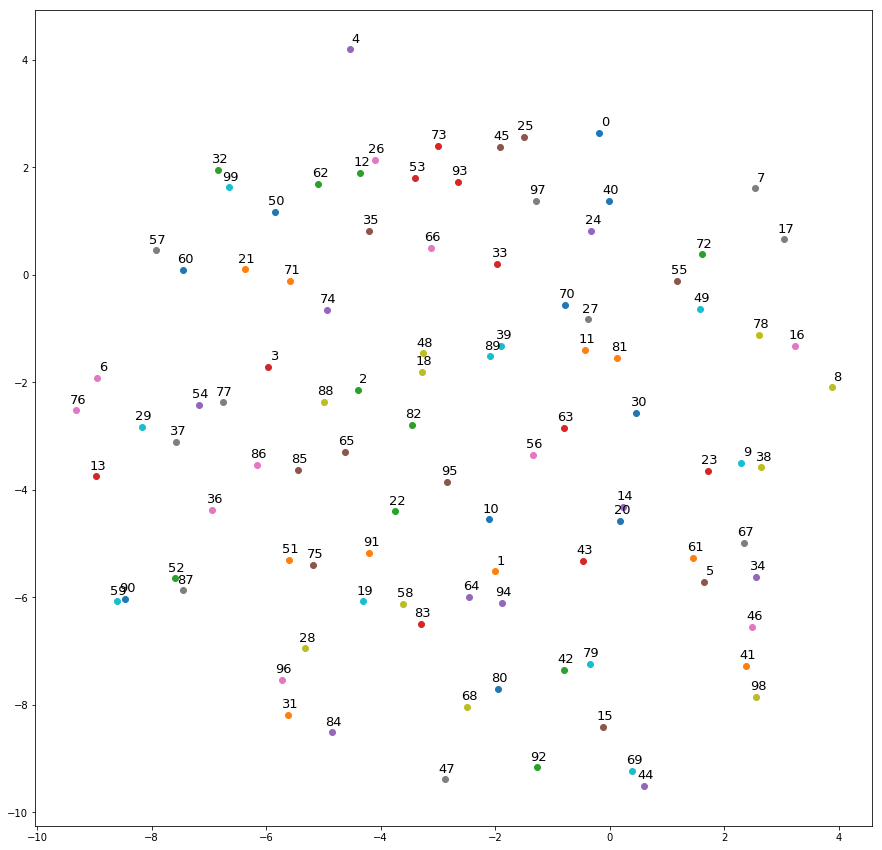

In [33]:
time=3
x, y, labels = tsne_plot(embeddings_val,time, "tsne_odd_even_time{}.png".format(time))

In [44]:
from scipy import spatial
num1 = 2
num2 = 11
time = 3
result = 1 - spatial.distance.cosine(embeddings_val[num1][time], embeddings_val[num2][time])
result

0.3247963786125183